# 予測する

In [184]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import librosa
import librosa.feature
import librosa.display

test_image = []

In [185]:
# モデルの読み込み
model = keras.models.load_model("cnn_merspectrogram_01.h5")

In [186]:
# 音声ファイル読み込み
file_path = "disease02.wav"
y, sr = librosa.load(file_path, sr=44100)

In [187]:
# 短時間フーリエ変換
# 振幅スペクトログラムを算出
D = np.abs(librosa.stft(y)) # STFT
D_dB = librosa.amplitude_to_db(D, ref=np.max)

In [188]:
# メルスペクトログラムを算出
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.amplitude_to_db(S, ref=np.max)

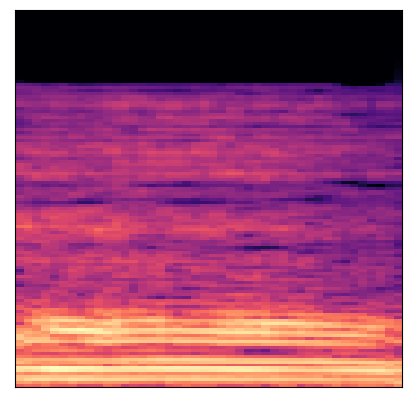

In [189]:
# 画像を一旦保存する
plt.figure(figsize=(5,5), dpi=100)
librosa.display.specshow(S_dB, sr=sr)
plt.savefig("tmp.jpg")

In [190]:
# テスト画像の読み込み
image_path = "tmp.jpg"
#image_path = "data/mer_spectrogram_images/disease/voice_data_bad_003.jpg"
X = np.array((Image.open(image_path).resize((224,224))))
test_image = np.array([X])

In [191]:
pred = model.predict(test_image)
print(pred) # 1枚目のテストデータの予測

ValueError: in user code:

    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:414 call
        return self._run_internal_graph(
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\kante\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 186624 but received input with shape (None, 968256)
